In [ ]:
# https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [ ]:
# importing dataset
data_set = pd.read_csv("/content/car_details.csv")

In [ ]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:,1].values

In [ ]:
print(data_set.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [ ]:

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

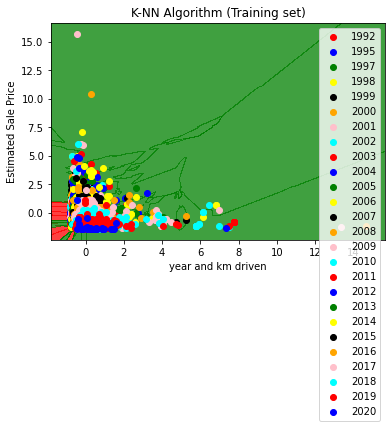

In [ ]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red','blue','green','yellow','black','orange','pink','cyan','red','blue','green','yellow','black','orange','pink','cyan','red','blue','green','yellow','black','orange','pink','cyan','red','blue','green','yellow'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('year and km driven')  
mtp.ylabel('Estimated Sale Price')  
mtp.legend()  
mtp.show()  

In [ ]:
print(x_set[:,0])
print(x_set)

[ 0.04873887  0.26695902 -0.45753187 ... -0.39643023  0.17967096
 -0.46626242]
[[ 0.04873887  0.53249023]
 [ 0.26695902  0.0664717 ]
 [-0.45753187 -0.27245087]
 ...
 [-0.39643023 -0.95029601]
 [ 0.17967096  0.0664717 ]
 [-0.46626242 -0.10298959]]
